8572503.809111709
4286251.904555854
[1.00000000e+00 1.05729077e+00 1.11786377e+00 1.18190704e+00
 1.24961941e+00 1.32121106e+00 1.39690426e+00 1.47693398e+00
 1.56154866e+00 1.65101099e+00 1.74559868e+00 1.84560537e+00
 1.95134152e+00 2.06313537e+00 2.18133399e+00 2.30630429e+00
 2.43843423e+00 2.57813400e+00 2.72583728e+00 2.88200260e+00
 3.04711474e+00 3.22168629e+00 3.40625917e+00 3.60140638e+00
 3.80773372e+00 4.02588171e+00 4.25652757e+00 4.50038731e+00
 4.75821796e+00 5.03081992e+00 5.31903946e+00 5.62377132e+00
 5.94596150e+00 6.28661021e+00 6.64677494e+00 7.02757379e+00
 7.43018889e+00 7.85587013e+00 8.30593897e+00 8.78179260e+00
 9.28490825e+00 9.81684778e+00 1.03792625e+01 1.09738985e+01
 1.16026015e+01 1.22673235e+01 1.29701279e+01 1.37131965e+01
 1.44988361e+01 1.53294855e+01 1.62077236e+01 1.71362765e+01
 1.81180269e+01 1.91560226e+01 2.02534859e+01 2.14138237e+01
 2.26406381e+01 2.39377377e+01 2.53091491e+01 2.67591297e+01
 2.82921808e+01 2.99130616e+01 3.16268039e+01 3.3

/tmp/ipykernel_16804/298102930.py:99: RuntimeWarning: divide by zero encountered in divide
  return 7*10**39 * B_NS_15 * R_NS_6**3 * in_ang_freq_4**2 * t_sd_v/ep
/tmp/ipykernel_16804/298102930.py:160: RuntimeWarning: invalid value encountered in power
  (1 - e_h_v/e_m_v)**n * (1 + k(e_m_v, e_h_v, e_m_v)))
/tmp/ipykernel_16804/298102930.py:121: RuntimeWarning: divide by zero encountered in log
  return 280 - 8.7 * np.log(e_v) + 1.14 * (np.log(e_v))**2
/tmp/ipykernel_16804/298102930.py:154: RuntimeWarning: invalid value encountered in power
  (1 - e_h_v/e_m_v)**n * (1 + k(e_h_v, e_h_v, e_m_v)))
/tmp/ipykernel_16804/298102930.py:116: RuntimeWarning: divide by zero encountered in log
  return 1.36 + 0.42 * np.log(np.log(e_v)) + (3.40 + 18.7 * e_v**-0.43 - 0.079 *
/tmp/ipykernel_16804/298102930.py:116: RuntimeWarning: invalid value encountered in log
  return 1.36 + 0.42 * np.log(np.log(e_v)) + (3.40 + 18.7 * e_v**-0.43 - 0.079 *
/tmp/ipykernel_16804/298102930.py:116: RuntimeWarning: divide

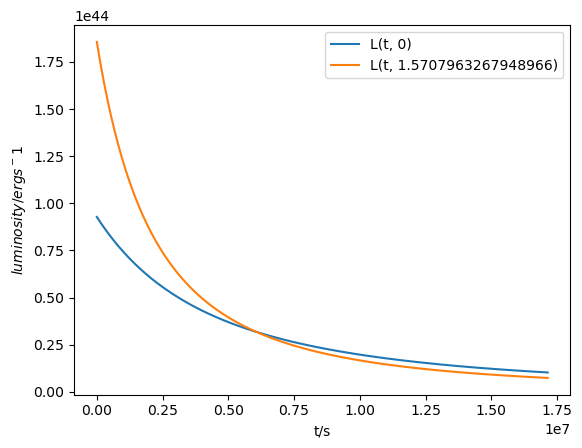

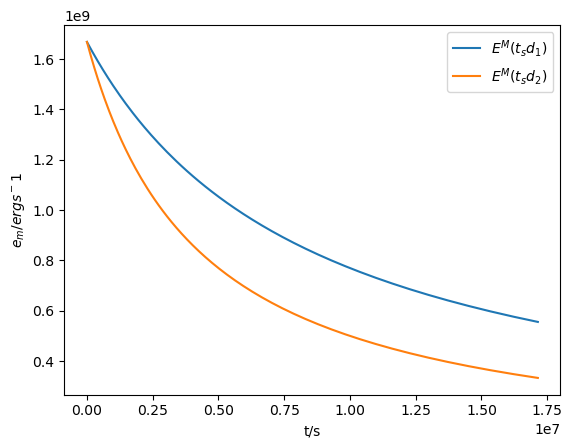

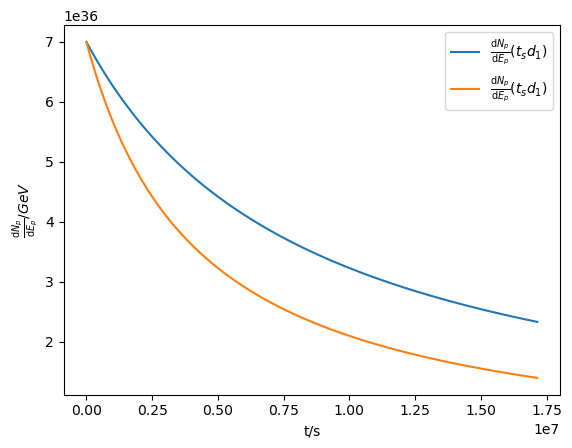

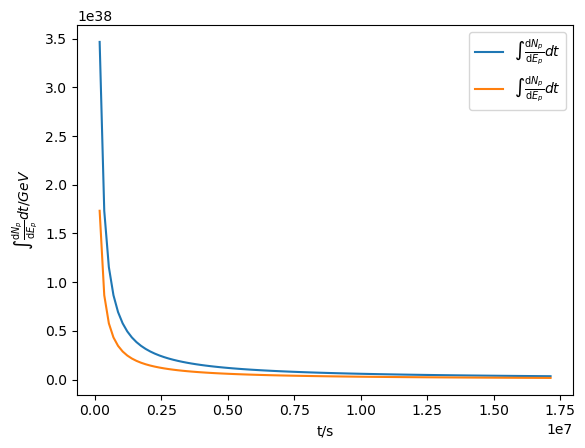

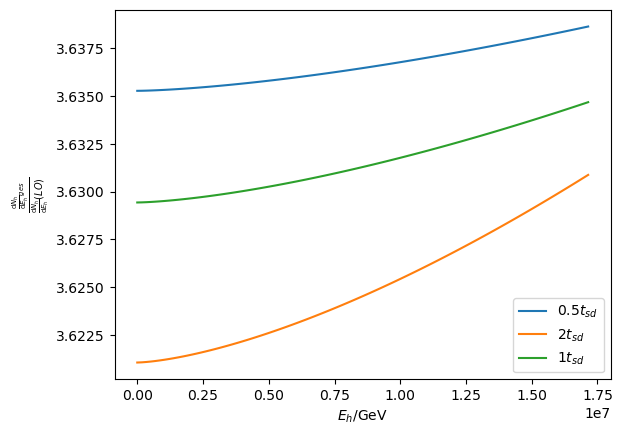

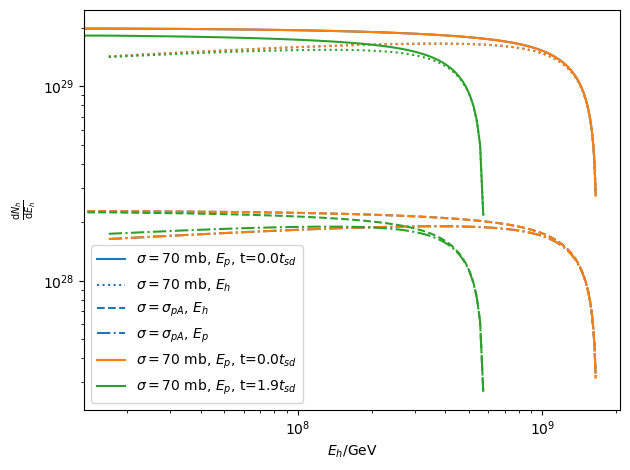

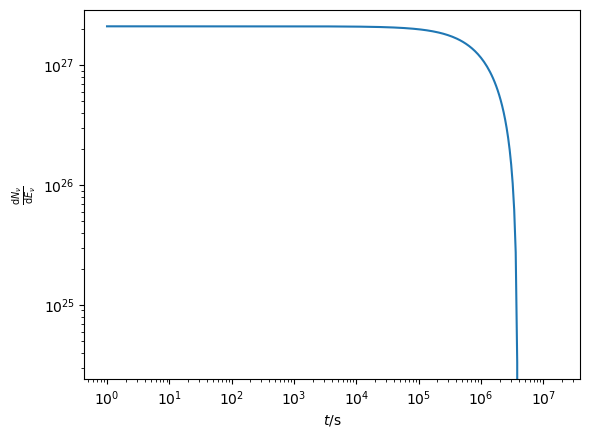

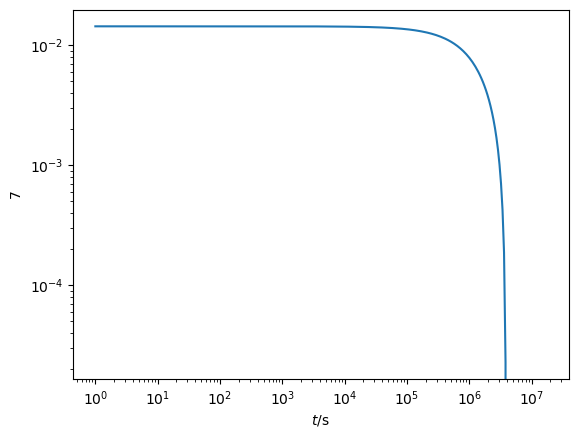

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


# https://nssdc.gsfc.nasa.gov/planetary/factsheet/sunfact.html

B_NS = 10**14  # G
R_NS = 10**4  # m
R_NS = R_NS * 100  # cm
in_ang_freq = 10**3  # Hz
chi = [0, np.pi/2]
M_NS = 2  # M_S
M_S = 1988500*10**24  # kg
M_NS = M_NS*M_S*10**3  # g
# M_S Achtung bei Werten die nicht in Sonnenmassen gegeben
# sind, diese müssen ggf. noch normiert werden

c = 299792458  # m/s
c_cgs = c*10**2  # cm/s

# e = 4.803*10**-10  #statC

B_NS_15 = B_NS*10**-15
R_NS_6 = R_NS*10**-6
in_ang_freq_4 = in_ang_freq*10**-4

I_NS = 2/5*M_NS*R_NS**2

I_NS_45 = I_NS*10**-45


def t_sd(winkel):
    return (2 * c_cgs**3 * I_NS * B_NS**-2 * R_NS**-6 * in_ang_freq**-2 *
            1/(1+(np.sin(winkel))**2))


t_sd_1 = t_sd(chi[0])

print(t_sd_1)

t_sd_2 = t_sd(chi[1])

print(t_sd_2)

# t_1 = np.linspace(0, 2*max(t_sd_2, t_sd_1), 300)
t_1 = np.logspace(0, np.log10(2*max(t_sd_2, t_sd_1)), 300)
print(t_1)


def lm(t, t_sd_v, winkel):
    return (((B_NS**2 * R_NS**6 * in_ang_freq**4)/(4*c_cgs**3)) *
            (1+(np.sin(winkel))**2) * (1 + t/t_sd_v)**-2)


fig_1, ax = plt.subplots()

ax.plot(t_1, lm(t_1, t_sd_1, chi[0]), label=f"L(t, {chi[0]})")
ax.plot(t_1, lm(t_1, t_sd_2, chi[1]), label=f"L(t, {chi[1]})")
ax.set_xlabel("t/s")
ax.set_ylabel(r"$luminosity/erg s^-1$")
ax.legend()


f_acc = 0.1
f_acc_n1 = f_acc*10**1

e = 4.8032047*10**-10  # esu


def e_m(t, t_sd_v):
    return (f_acc * e * B_NS * R_NS**3 * in_ang_freq**2 * (2 * c_cgs**2)**-1 *
            (1 + t/t_sd_v)**-1) * 624.151  # 1 erg = 624.151 GeV


fig_2, ax = plt.subplots()

ax.plot(t_1, e_m(t_1, t_sd_1), label=r"$E^{M}(t_sd_1)$")
ax.plot(t_1, e_m(t_1, t_sd_2), label=r"$E^{M}(t_sd_2)$")
ax.set_xlabel("t/s")
ax.set_ylabel(r"$e_{m}/erg s^-1$")
ax.legend()


def dnde(t, t_sd_v):
    return 7*10**39 * B_NS_15 * R_NS_6**3 * in_ang_freq_4**2 * (1 + t/t_sd_v)**-1


fig_3, ax = plt.subplots()

ax.plot(t_1, dnde(t_1, t_sd_1), label=r"$\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}(t_sd_1)$")
ax.plot(t_1, dnde(t_1, t_sd_2), label=r"$\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}(t_sd_1)$")
ax.set_xlabel("t/s")
ax.set_ylabel(r"$\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}/GeV$")  # ?
ax.legend()


def dndedt(ep, t_sd_v):
    return 7*10**39 * B_NS_15 * R_NS_6**3 * in_ang_freq_4**2 * t_sd_v/ep


e_p = np.linspace(0, 2*max(t_sd_1, t_sd_2), 100)

fig_4, ax = plt.subplots()

ax.plot(e_p, dndedt(e_p, t_sd_1), label=r"$\int\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}dt$")
ax.plot(e_p, dndedt(e_p, t_sd_2), label=r"$\int\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}dt$")
ax.set_xlabel("t/s")
ax.set_ylabel(r"$\int\frac{\mathrm{d}N_{p}}{\mathrm{d}E_{p}}dt/GeV$")
ax.legend()


# hadronic spectra

def k(e_v, e_h_v, e_p_v):
    return 1.36 + 0.42 * np.log(np.log(e_v)) + (3.40 + 18.7 * e_v**-0.43 - 0.079 *
                                                np.log(e_v)) * (e_h_v/e_p_v)**1.5


def sigma_pa(e_v):
    return 280 - 8.7 * np.log(e_v) + 1.14 * (np.log(e_v))**2


def dsdxe_ges(e_v, e_h_v, e_p_v, n=0.51):
    return sigma_pa(e_v) * (1+n) * (1 - e_h_v/e_p_v)**n * (1+k(e_v, e_h_v, e_p_v))


def dsdxe_lo(e_v, e_h_v, e_p_v, n=0.51):
    return sigma_pa(e_v) * (1 + n) * (1-e_h_v/e_p_v)**n


e_h = np.linspace(0, 2*max(t_sd_1, t_sd_2), 100)


fig_4_1, ax_4_1 = plt.subplots()
times = [0.5, 2, 1]
for time in times:
    ax_4_1.plot(e_h, dsdxe_ges(e_m(time * t_sd_1, t_sd_1), e_h, e_m(time * t_sd_1, t_sd_1)) /
                dsdxe_lo(e_m(time * t_sd_1, t_sd_1), e_h, e_m(time * t_sd_1, t_sd_1)),
                label=fr"${time}${r'$t_{sd}$'}")
ax_4_1.legend()
ax_4_1.set_xlabel(r'$E_h/\mathrm{GeV}$')
ax_4_1.set_ylabel(r'$\frac{\frac{\mathrm{d}N_h}{\mathrm{d}E_h}_{ges}}{\frac{\mathrm{d}N_h}{\mathrm{d}E_h}(LO)}$')


def c(t, t_sd_v, e_m_v, sigma_pp_model):
    return (B_NS * R_NS**3 * in_ang_freq**2 * (e * c_cgs * (1 + t / t_sd_v))**-1 *
            1/(e_m_v * sigma_pp_model(e_m_v)))


def dnde_eh(t, t_sd_v, sigma_pp_model, e_h_v, n=0.51):
    e_m_v = e_m(t, t_sd_v)
    return (c(t, t_sd_v, e_m_v, sigma_pp_model) * sigma_pa(e_h_v) * (1+n) *
            (1 - e_h_v/e_m_v)**n * (1 + k(e_h_v, e_h_v, e_m_v)))


def dnde_ep(t, t_sd_v, sigma_pp_model, e_h_v, n=0.51):
    e_m_v = e_m(t, t_sd_v)
    return (c(t, t_sd_v, e_m_v, sigma_pp_model) * sigma_pa(e_m_v) * (1+n) *
            (1 - e_h_v/e_m_v)**n * (1 + k(e_m_v, e_h_v, e_m_v)))


def constant(*_):
    return 70

# * bedeutet belibig viele Argumente einzsetzbar


fig_5, ax_5 = plt.subplots()
N_times = 3
plot_ts = t_1[::len(t_1)//(N_times-1)-1]  # // bedeutet teilen und runden ab,
# -1 für punkt am ende
print(plot_ts)
e_max = e_m(0, t_sd_1)
plot_e = np.linspace(0, e_max, 100)  # linspace für energiewerte x-Achse
for i, t_ in enumerate(plot_ts):
    ax_5.plot(plot_e, dnde_ep(t_, t_sd_1, constant, plot_e), color=f"C{i}", linestyle='-',
              label=rf'$\sigma = ${constant(0)} mb, $E_p$, t={round(t_/t_sd_1, 1)}{r"$t_{sd}$"}')
    ax_5.plot(plot_e, dnde_eh(t_, t_sd_1, constant, plot_e), color=f"C{i}", linestyle=':',
              label=rf'$\sigma = ${constant(0)} mb, $E_h$' if i == 0 else None)
    ax_5.plot(plot_e, dnde_ep(t_, t_sd_1, sigma_pa, plot_e), color=f"C{i}", linestyle='--',
              label=r'$\sigma = \sigma_{pA}$, $E_h$' if i == 0 else None)
    ax_5.plot(plot_e, dnde_eh(t_, t_sd_1, sigma_pa, plot_e), color=f"C{i}", linestyle='-.',
              label=r'$\sigma = \sigma_{pA}$, $E_p$' if i == 0 else None)
ax_5.loglog()
ax_5.legend()
ax_5.set_xlabel(r'$E_h/\mathrm{GeV}$')
ax_5.set_ylabel(r'$\frac{\mathrm{d}N_h}{\mathrm{d}E_h}$')

plt.tight_layout()


# C{i} i zahl von zeit wert (hier drei) und legt farbe mt jeweiliger zahl fest:
# t1, wert 0 -> C0 = farbe blau
# .0f rundet auf nullte nachkommastelle nur für das printen


# hinzufügen des cooling Faktor

def dnde_eh_f(t, t_sd_v, sigma_pp_model, e_h_v, cooling_factor, n=0.51):
    e_m_v = e_m(t, t_sd_v)
    c_vals = c(t, t_sd_v, e_m_v, sigma_pp_model)
    return (c_vals * sigma_pa(e_h_v) * (1+n) *
            (1 - e_h_v/e_m_v)**n * (1 + k(e_h_v, e_h_v, e_m_v))) * cooling_factor()


def dnde_ep_f(t, t_sd_v, sigma_pp_model, e_h_v, cooling_factor, n=0.51):
    e_m_v = e_m(t, t_sd_v)
    c_vals = c(t, t_sd_v, e_m_v, sigma_pp_model)
    return (c_vals * sigma_pa(e_m_v) * (1+n) *
            (1 - e_h_v/e_m_v)**n * (1 + k(e_m_v, e_h_v, e_m_v))) * cooling_factor()


def constant_cooling_factor(*_):
    return 1


# hadronic decays für Teilchen D_0

m_h_D_0 = 1.864  # GeV

sqrt_s_eff_h_D_0 = 0.67

lamda_h_D_0 = (sqrt_s_eff_h_D_0/m_h_D_0)**2


def d(lamda):
    return 1 - 8 * lamda - 12 * lamda**2 * np.log(lamda) + 8 * lamda**3 - lamda**4


def f_h_nu(y, lamda):
    return 1/d(lamda) * (6 * (1 - 2 * lamda) * (1 - lamda)**2 - 4 * (1 - lamda)**3 -
                         12 * lamda**3 * (1 - lamda) + 12 * lamda**2 * y - 6 * (1 - 2 * lamda) * y**2 +
                         4 * y**3 + 12 * lamda**2 * np.log((1-y)/lamda))


# gauß-legendre-quadratur
def dnde_nu(t, e_nu: float, res_=300):  # res=resolution (Auflösung im Integral)

    roots_, weights_ = scipy.special.roots_legendre(res_)
    # nullstellen = roots und gewichte = weights bestimmen/ausgeben (ist ein Tupel) für ein Integral von -1 bis 1

    min_vals = [min(e_nu / e_m(t_val, t_sd_1), 1 - lamda_h_D_0) for t_val in t]  # t_val geht alle zeiten in t durch
    # wenn größer als 1-lambda dann 1-lambda -> integration über nichts
    max_vals = [1-lamda_h_D_0 for _ in t]  # obere grenze immer 1-lambda

    t_roots = [(lo + hi)/2 + (hi - lo)/2 * roots_ for lo, hi in zip(min_vals, max_vals)]
    t_weights = [(hi - lo)/2 * weights_ for lo, hi in zip(min_vals, max_vals)]
    # roots und weights passent skaliert für jeweiliges tupel aus min_vals und max_vals (untere und obere Grenze)

    return [0 if np.sum(t_weight) == 0 else
            np.sum(1 / t_root * dnde_eh_f(t_val, t_sd_1, sigma_pa, e_nu/t_root, constant_cooling_factor)
                   * f_h_nu(t_root, lamda_h_D_0) * t_weight)
            for t_val, t_root, t_weight in zip(t, t_roots, t_weights)]

# null wenn die summe aller gewichte Null ist (Grenzen gleich) sonst nans
# sigma_pa wechseln wenn anderer Wirkungsquerschnitt
# e_nu/t_root = E_h, t_roots sind y-Werte, für jeden t-Wert unterschiedliche Stützstellen


e_nu_plot = 10**9

fig_6, ax_6 = plt.subplots()
dnde_plot = dnde_nu(t_1, e_nu_plot)
ax_6.plot(t_1, dnde_plot)
ax_6.loglog()
ax_6.set_xlabel(r'$t/\mathrm{s}$')
ax_6.set_ylabel(r'$\frac{\mathrm{d}N_{\nu}}{\mathrm{d}E_{\nu}}$')

fig_7, ax_7 = plt.subplots()
dist = 3.5 * 3.086 * 10**22  # Mpc
flux = (4 * np.pi * dist**2)**-1 * e_nu_plot**2 * np.array(dnde_nu(t_1, e_nu_plot))
ax_7.plot(t_1, flux)
ax_7.loglog()
ax_7.set_xlabel(r'$t/\mathrm{s}$')
ax_7.set_ylabel(r'$7$')


plt.show()
